# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.columns.tolist()


['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [5]:
# 秀出資料欄位的類型與數量
app_train_df = app_train.dtypes.reset_index()
app_train_df.columns = ["Count", "Column Type"]
app_train_df = app_train_df.groupby("Column Type").aggregate('count').reset_index()
app_train_df

,Column Type,Count
0,int64,41
1,float64,65
2,object,16


In [6]:
#確定只有 int64, float64, object 三種類型後, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
for dtype, feature in zip(app_train.dtypes, app_train.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

41 Integer Features : ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

65 Float Features : ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OW

In [7]:
##計算資料用戶 收入平均 與標準差 'AMT_INCOME_TOTAL'
print('the mean value of user_group is', app_train['AMT_INCOME_TOTAL'].mean())

print('the std value of user_group is', app_train['AMT_INCOME_TOTAL'].std())
app_train_income_mean = app_train['AMT_INCOME_TOTAL'].mean()
app_train_income_std = app_train['AMT_INCOME_TOTAL'].std()



the mean value of user_group is 168797.9192969845
the std value of user_group is 237123.14627883647


Identified outliers: 454
Non-outlier observations: 307057


(array([1.4010e+03, 7.1400e+03, 1.8555e+04, 3.0982e+04, 1.1436e+04,
        4.2611e+04, 4.1531e+04, 2.9522e+04, 7.6700e+03, 2.8316e+04,
        1.8586e+04, 2.2936e+04, 1.6840e+03, 6.9830e+03, 1.1408e+04,
        4.0070e+03, 6.5420e+03, 3.0300e+02, 2.0310e+03, 4.4050e+03,
        1.1740e+03, 2.2500e+02, 1.7700e+03, 5.4600e+02, 2.6100e+03,
        4.1000e+01, 1.0200e+02, 2.9200e+02, 5.2000e+01, 1.8000e+01,
        7.7000e+02, 6.4000e+01, 1.8700e+02, 6.0000e+00, 3.6000e+01,
        1.2800e+02, 2.0000e+01, 6.0000e+00, 6.6600e+02, 1.6000e+01,
        7.5000e+01, 3.0000e+00, 1.5000e+01, 5.6000e+01, 7.0000e+00,
        1.0000e+00, 8.9000e+01, 8.0000e+00, 1.8000e+01, 7.0000e+00]),
 array([ 25650.,  42687.,  59724.,  76761.,  93798., 110835., 127872.,
        144909., 161946., 178983., 196020., 213057., 230094., 247131.,
        264168., 281205., 298242., 315279., 332316., 349353., 366390.,
        383427., 400464., 417501., 434538., 451575., 468612., 485649.,
        502686., 519723., 536760.,

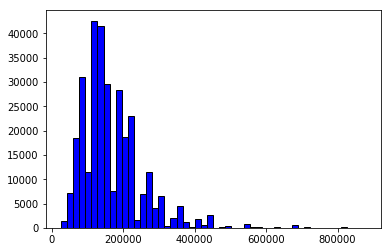

In [16]:
#繪製收入常態分佈直方圖

income_array = app_train['AMT_INCOME_TOTAL'].values
##去除離群值
# calculate summary statistics
# identify outliers
cut_off = app_train_income_std * 3
lower, upper = app_train_income_mean - cut_off, app_train_income_mean + cut_off
# identify outliers
outliers = [x for x in income_array if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in income_array if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

plt.hist(outliers_removed, color = 'blue', edgecolor = 'black',
         bins = int(50))
